## _Input Data, Detector Layout, Distributions_

In [1]:
import sys, os, glob, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# append parent dir
sys.path.append('..')

# local imports
from src import Compose_Event, Draw_Compose_Event

## _Input Data_

In [6]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
input_dir = '../train_all'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [7]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)
all_files[:10]

['event0000002375-hits.csv',
 'event0000005092-cells.csv',
 'event0000002530-particles.csv',
 'event0000002941-hits.csv',
 'event0000003297-truth.csv',
 'event0000005431-hits.csv',
 'event0000003220-cells.csv',
 'event0000005506-cells.csv',
 'event0000001280-cells.csv',
 'event0000005367-cells.csv']

In [8]:
# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, '')) for f in all_files if f.endswith(suffix))
file_prefixes[:10]

['../train_all/event0000000000',
 '../train_all/event0000000001',
 '../train_all/event0000000002',
 '../train_all/event0000000003',
 '../train_all/event0000000004',
 '../train_all/event0000000005',
 '../train_all/event0000000006',
 '../train_all/event0000000007',
 '../train_all/event0000000008',
 '../train_all/event0000000009']

In [9]:
# number of events
len(file_prefixes)

10000

In [10]:
# OR, Extract File Prefixes (only works if we don't have any additional files e.g. *.root, *.log etc.)
all_events = sorted(np.unique([os.path.join(input_dir, event[:15]) for event in all_files]))
all_events[:10]

['../train_all/event0000000000',
 '../train_all/event0000000001',
 '../train_all/event0000000002',
 '../train_all/event0000000003',
 '../train_all/event0000000004',
 '../train_all/event0000000005',
 '../train_all/event0000000006',
 '../train_all/event0000000007',
 '../train_all/event0000000008',
 '../train_all/event0000000009']

In [11]:
# number of events (in addition to *.csv, *.root and *.log files exists in this dir.)
len(all_events)

10000

In [12]:
event_id = 1

In [13]:
# Fetch an event, use event_id (int)
prefix = "event{:010d}".format(event_id)                     # OR, 
prefix = str('event{!s}'.format(format(event_id, '010d')))   # a little better
event_prefix = os.path.join(input_dir, prefix)              # event_prefix ~ event_file = input_dir + prefix

In [14]:
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

In [15]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,14.645000,35.0,9,0,7
1,2,-8.74686,15.150000,35.0,9,1,112
2,3,-8.74686,16.160000,35.0,9,2,222
3,4,-9.62154,16.665001,35.0,9,3,339
4,5,-9.62154,17.674999,35.0,9,4,461


In [16]:
# OR, use event_id to fectch one file from list of all files
event_prefix = file_prefixes[event_id]
print(event_prefix)

../train_all/event0000000001


In [17]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

# memory usage
mem_bytes = (hits.memory_usage(index=True).sum() 
             + tubes.memory_usage(index=True).sum() 
             + particles.memory_usage(index=True).sum() 
             + truth.memory_usage(index=True).sum())

print('{} memory usage {:.2f} MB'.format(os.path.basename(event_prefix), mem_bytes / 2**20))

event0000000001 memory usage 0.03 MB


In [18]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-7.87217,14.645000,35.0,9,0,7
1,2,-8.74686,15.150000,35.0,9,1,112
2,3,-8.74686,16.160000,35.0,9,2,222
3,4,-9.62154,16.665001,35.0,9,3,339
4,5,-9.62154,17.674999,35.0,9,4,461


In [19]:
tubes.head()

,hit_id,isochrone,depcharge,energyloss,volume_id,layer_id,module_id,skewed,sector_id
0,1,0.312154,8106480.0,8.10648,9,0,7,0,0
1,2,0.243986,4438520.0,4.43852,9,1,112,0,0
2,3,0.227273,12218100.0,12.21810,9,2,222,0,0
3,4,0.326345,4719830.0,4.71983,9,3,339,0,0
4,5,0.112023,12483800.0,12.48380,9,4,461,0,0


In [20]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.467824,0.843642,-0.308224,1,26,13,0
1,2,0.0,0.0,0.0,-0.295066,0.393566,-0.364931,1,25,13,0
2,3,0.0,0.0,0.0,-0.266403,0.004486,0.150829,1,27,13,0
3,4,0.0,0.0,0.0,0.004641,0.066527,0.119620,1,40,13,0
4,5,0.0,0.0,0.0,0.193790,0.088343,0.188068,1,23,13,0


In [21]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-8.14818,14.503100,-12.1190,-0.304760,0.592697,-0.481614,1.0,10
1,2,-8.53445,15.258200,-12.7318,-0.302497,0.593937,-0.481471,1.0,10
2,3,-8.94150,16.061899,-13.3825,-0.299945,0.595248,-0.481365,1.0,10
3,4,-9.31965,16.815701,-13.9915,-0.297617,0.596324,-0.481449,1.0,10
4,5,-9.72147,17.625601,-14.6446,-0.295214,0.597517,-0.481419,1.0,10


### _(1) - Detector Layout_

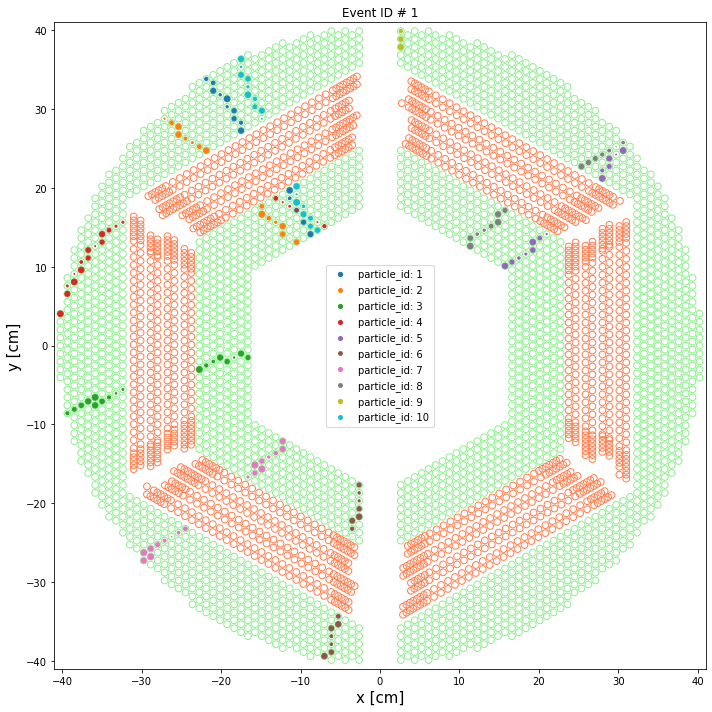

In [22]:
event = Compose_Event(event_prefix,skewed=False)
Draw_Compose_Event(event,figsize=(10,10));

### _(2) - Draw Individual Tracks_

In [23]:
# preprocess hits
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
hits_ = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))
hits_.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
0,1,-7.87217,14.645000,35.0,9,0,7,16.626698
1,2,-8.74686,15.150000,35.0,9,1,112,17.493714
2,3,-8.74686,16.160000,35.0,9,2,222,18.375341
3,4,-9.62154,16.665001,35.0,9,3,339,19.243084
4,5,-9.62154,17.674999,35.0,9,4,461,20.124106


In [24]:
# we already have sorted hits, lets draw a single track.
data = hits_[truth.particle_id == particles.iloc[1,0]]
data.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r
191,192,-10.4962,13.130,35.0,9,0,10,16.809733
192,193,-11.3709,13.635,35.0,9,1,115,17.754171
193,194,-12.2456,14.140,35.0,9,2,226,18.705462
194,195,-12.2456,15.150,35.0,9,3,342,19.480175
195,196,-13.1203,15.655,35.0,9,4,465,20.425996


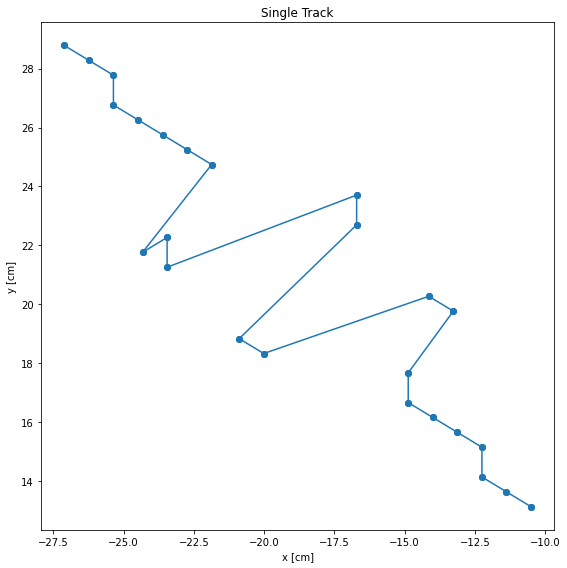

In [25]:
# Using Object Oriented API
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(data.x.values, data.y.values)
ax.plot(data.x.values, data.y.values, "-o")

ax.set_title('Single Track')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
fig.tight_layout()
# fig.savefig('event.png')

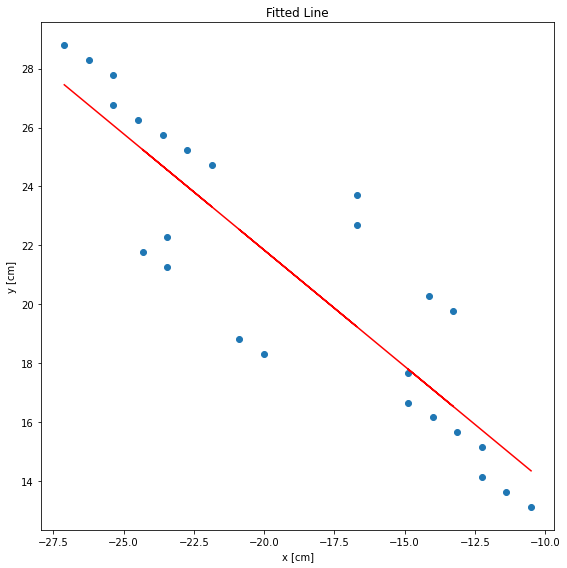

In [26]:
# Using Object Oriented API
plt.close('all')
fig, ax = plt.subplots(figsize=(8,8))

a, b = np.polyfit(data.x, data.y, 1)
y = a*data.x.values + b

ax.scatter(data.x.values, data.y.values)
ax.plot(data.x.values, y, 'r')
ax.set_title('Fitted Line')
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
# ax.set_xlim(-40, 40)
# ax.set_ylim(-40, 40)
fig.tight_layout()
# fig.savefig('event.png')

### _(3) - Momentum Distributions_

In [27]:
# calculate & assign pt
particles = particles.assign(pt=np.sqrt(particles.px**2 + particles.py**2))

In [28]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,pt
0,1,0.0,0.0,0.0,-0.467824,0.843642,-0.308224,1,26,13,0,0.964671
1,2,0.0,0.0,0.0,-0.295066,0.393566,-0.364931,1,25,13,0,0.491892
2,3,0.0,0.0,0.0,-0.266403,0.004486,0.150829,1,27,13,0,0.266441
3,4,0.0,0.0,0.0,0.004641,0.066527,0.119620,1,40,13,0,0.066689
4,5,0.0,0.0,0.0,0.193790,0.088343,0.188068,1,23,13,0,0.212976


In [29]:
particles.pt

0    0.964671
1    0.491892
2    0.266441
3    0.066689
4    0.212976
5    1.091815
6    0.521935
7    0.225861
8    0.976905
9    0.671610
Name: pt, dtype: float32

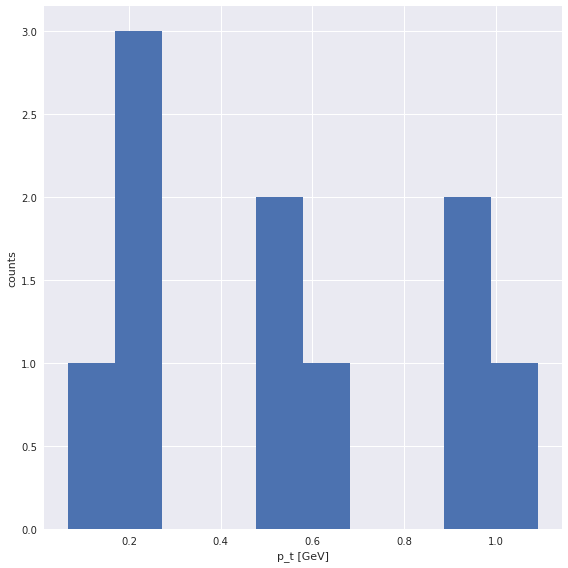

In [30]:
# Using Pyplot API
plt.close('all')
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,8))

plt.hist(particles.pt, bins=10)

plt.xlabel('p_t [GeV]')
plt.ylabel('counts')
# plt.xlim((0.1, 1.5))
# plt.ylim((5, 40))
plt.tight_layout()

In [31]:
# find average hits per track
print("Average number of hits per tracks: {}".format(hits.hit_id.count()/particles.particle_id.unique().size))

Average number of hits per tracks: 24.2


## _Misc._